## 1. Business Understanding

## 2. Data Understanding
##### Step 1: Data Collection and Initial Exploration

In [1]:
import pandas as pd

# Load the dataset
file_path = 'data/combined_phishing_data/combined_phishing_data.csv'
df = pd.read_csv(file_path)

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nFirst 5 Rows of the Dataset:")
display(df.head())

print("\nData Types and Null Values:")
display(df.info())

print("\nColumns:")
# Print all column names, one per line
for col in df.columns:
    print(col)



C:\Users\Administrator\AppData\Local\Temp\ipykernel_18144\2131158602.py:5: DtypeWarning: Columns (88,93,120) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Dataset Shape: (247225, 124)

First 5 Rows of the Dataset:


,URL,URLLength,DomainLength,IsDomainIP,nb_dots,nb_hyphens,nb_at,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfEqualsInURL,...,IsResponsive,Crypto,Bank,HasSubmitButton,LargestLineLength,Pay,TLD,NoOfOtherSpecialCharsInURL,ObfuscationRatio,DegitRatioInURL
0,https://www.todayshomeowner.com/how-to-make-ho...,82,23,0,2.0,7.0,0.0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,http://thapthan.ac.th/information/confirmation...,93,14,1,2.0,0.0,0.0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,http://app.dialoginsight.com/T/OFC4/L2S/3888/B...,121,21,1,3.0,0.0,0.0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.bedslide.com,24,16,0,2.0,0.0,0.0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://tabs.ultimate-guitar.com/s/sex_pistols...,73,24,0,3.0,1.0,0.0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Data Types and Null Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247225 entries, 0 to 247224
Columns: 124 entries, URL to DegitRatioInURL
dtypes: float64(107), int64(13), object(4)
memory usage: 233.9+ MB


None


Columns:
URL
URLLength
DomainLength
IsDomainIP
nb_dots
nb_hyphens
nb_at
NoOfQMarkInURL
NoOfAmpersandInURL
NoOfEqualsInURL
nb_underscore
nb_tilde
nb_percent
nb_slash
nb_star
nb_colon
nb_comma
nb_semicolumn
nb_dollar
nb_space
nb_www
nb_com
nb_dslash
http_in_path
IsHTTPS
ratio_digits_url
ratio_digits_host
punycode
port
tld_in_path
tld_in_subdomain
abnormal_subdomain
NoOfSubDomain
prefix_suffix
random_domain
shortening_service
path_extension
nb_redirection
nb_external_redirection
length_words_raw
char_repeat
shortest_words_raw
shortest_word_host
shortest_word_path
longest_words_raw
longest_word_host
longest_word_path
avg_words_raw
avg_word_host
avg_word_path
phish_hints
domain_in_brand
brand_in_subdomain
brand_in_path
suspecious_tld
statistical_report
nb_hyperlinks
ratio_intHyperlinks
ratio_extHyperlinks
nb_extCSS
ratio_extRedirection
ratio_extErrors
login_form
HasFavicon
links_in_tags
ratio_intMedia
ratio_extMedia
NoOfiFrame
NoOfPopup
safe_anchor
onmouseover
right_clic
empty_title
domain

> **Key Insights:**
> There are 247,225 rows and 124 columns.
>> **Column Definitions**
>>- `URL`: The actual URL of the website.
>>- `URLLength`: Total character length of the URL.
>>- `DomainLength`: Length of the domain name within the URL.
>>- `IsDomainIP`: Indicates if the domain is represented by an IP address.
>>- `nb_dots`, `nb_hyphens`, `nb_at`, etc.: Count of specific symbols (., -, @, etc.) in the URL, which may hint at phishing patterns.
>>- `phish_hints`: Count of common phishing words or hints in the URL.
>>- `suspecious_tld`: Flag for suspicious top-level domains (e.g., .info, .tk)
>>- `google_index`: Whether the URL is indexed by Google, as phishing sites often aren't indexed.
>>- `label`: The classification target, indicating whether the URL is legitimate or phishing.

##### Step 2: Categorizing Columns into Numerical, Binary & Categorical

In [2]:
# Identify numerical, binary, and categorical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Binary features typically have only two unique values (e.g., 0 and 1)
binary_features = [col for col in numerical_features if df[col].nunique() == 2]

# Categorical features are non-numeric or have more than two unique values but should not be continuous
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
categorical_features += [col for col in numerical_features if col not in binary_features and df[col].nunique() < 20]

# Remove binary and categorical features from the numerical list to ensure no overlap
numerical_features = [col for col in numerical_features if col not in binary_features and col not in categorical_features]

# Display the feature types
print("Numerical Features:", numerical_features)
print("\nBinary Features:", binary_features)
print("\nCategorical Features:", categorical_features)


Numerical Features: ['URLLength', 'DomainLength', 'nb_hyphens', 'NoOfAmpersandInURL', 'NoOfEqualsInURL', 'nb_percent', 'nb_slash', 'ratio_digits_url', 'ratio_digits_host', 'length_words_raw', 'char_repeat', 'shortest_words_raw', 'shortest_word_host', 'shortest_word_path', 'longest_words_raw', 'longest_word_host', 'longest_word_path', 'avg_words_raw', 'avg_word_host', 'avg_word_path', 'nb_hyperlinks', 'ratio_intHyperlinks', 'ratio_extHyperlinks', 'nb_extCSS', 'ratio_extRedirection', 'ratio_extErrors', 'links_in_tags', 'ratio_intMedia', 'ratio_extMedia', 'NoOfiFrame', 'NoOfPopup', 'safe_anchor', 'domain_registration_length', 'domain_age', 'web_traffic', 'NoOfCSS', 'NoOfSelfRef', 'NoOfExternalRef', 'CharContinuationRate', 'DomainTitleMatchScore', 'NoOfLettersInURL', 'NoOfJS', 'NoOfImage', 'LineOfCode', 'URLTitleMatchScore', 'LetterRatioInURL', 'NoOfObfuscatedChar', 'NoOfDegitsInURL', 'NoOfEmptyRef', 'TLDLegitimateProb', 'SpacialCharRatioInURL', 'URLCharProb', 'URLSimilarityIndex', 'Larges

##### Step 3: Checking for Missing Values, Unique Values, and Statistical Summaries

In [3]:
# Count missing values in each column
print("Missing Values per Column:")
missing_values = df.isnull().sum()
display(missing_values)

# Count unique values in each column
print("\nUnique Values per Column:")
unique_values = df.nunique()
display(unique_values)

# Statistical summary of numerical columns
print("\nStatistical Summary for Numerical Columns:")
display(df.describe())


Missing Values per Column:


URL                                0
URLLength                          0
DomainLength                       0
IsDomainIP                         0
nb_dots                       235795
                               ...  
Pay                            11430
TLD                            11430
NoOfOtherSpecialCharsInURL     11430
ObfuscationRatio               11430
DegitRatioInURL                11430
Length: 124, dtype: int64


Unique Values per Column:


URL                           246755
URLLength                        515
DomainLength                     109
IsDomainIP                         2
nb_dots                           19
                               ...  
Pay                                2
TLD                              695
NoOfOtherSpecialCharsInURL        74
ObfuscationRatio                 146
DegitRatioInURL                  575
Length: 124, dtype: int64


Statistical Summary for Numerical Columns:


,URLLength,DomainLength,IsDomainIP,nb_dots,nb_hyphens,nb_at,NoOfQMarkInURL,NoOfAmpersandInURL,NoOfEqualsInURL,nb_underscore,...,URLSimilarityIndex,IsResponsive,Crypto,Bank,HasSubmitButton,LargestLineLength,Pay,NoOfOtherSpecialCharsInURL,ObfuscationRatio,DegitRatioInURL
count,247225.000000,247225.000000,247225.000000,11430.000000,11430.000000,11430.000000,247225.000000,247225.000000,247225.000000,11430.000000,...,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,2.357950e+05,235795.000000,235795.000000,235795.000000,235795.000000
mean,35.800752,21.452822,0.009542,2.480752,0.997550,0.022222,0.034572,0.031401,0.072917,0.322660,...,78.430778,0.624513,0.023474,0.127089,0.414301,1.278953e+04,0.237007,2.340198,0.000138,0.028616
std,42.431083,9.232625,0.097216,1.369686,2.087087,0.155500,0.205925,0.836250,0.938991,1.093336,...,28.976055,0.484249,0.151403,0.333074,0.492602,1.522011e+05,0.425247,3.527603,0.003817,0.070897
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.155574,0.000000,0.000000,0.000000,0.000000,2.200000e+01,0.000000,0.000000,0.000000,0.000000
25%,24.000000,16.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,57.024793,0.000000,0.000000,0.000000,0.000000,2.000000e+02,0.000000,1.000000,0.000000,0.000000
50%,28.000000,20.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,100.000000,1.000000,0.000000,0.000000,0.000000,1.090000e+03,0.000000,1.000000,0.000000,0.000000
75%,35.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,100.000000,1.000000,0.000000,0.000000,1.000000,8.047000e+03,0.000000,3.000000,0.000000,0.000000
max,6097.000000,214.000000,1.000000,24.000000,43.000000,4.000000,4.000000,149.000000,176.000000,18.000000,...,100.000000,1.000000,1.000000,1.000000,1.000000,1.397573e+07,1.000000,499.000000,0.348000,0.684000


> **Key Insights**
> - There is significant number of missing values in the `nb_dots`, `Pay`, `TLD`, `NoOfOtherSpecialCharsInURL`, `ObfuscationRatio`, and `DegitRatioInURL` columns.
> - The `URL` column contains 246,755 unique entries, indicating a diverse set of URLs.

##### Step 4: Checking for Duplicates

In [4]:
# Check for duplicate rows in the dataset
duplicate_rows = df[df.duplicated()]
duplicate_count = duplicate_rows.shape[0]

# Display the number of duplicate rows and preview them if any exist
print(f"Number of duplicate rows: {duplicate_count}")
if duplicate_count > 0:
    print(duplicate_rows.head())


Number of duplicate rows: 0


> **Key Insights:**
> - Since there are no duplicate rows in the dataset, we can conclude that each row is unique. Unique rows reduce the likelihood of redundancy, and since URLs are generally unique identifiers, this is a positive outcome for data quality.

##### Step 5: Checking for class imbalance in the target variable

In [5]:
# Check for class imbalance in the target variable
target_distribution = df['label'].value_counts(normalize=True) * 100
print("Class Distribution in Target Variable (Percentage):")
print(target_distribution)


Class Distribution in Target Variable (Percentage):
label
1    56.857114
0    43.142886
Name: proportion, dtype: float64


>**Key Insights:** 
>- It shows that 56.9% of the URLs are classified as 1 (phishing), while 43.1% of the URLs are classified as 0 (legitimate).
> - There is a moderate class imbalance: Though the dataset has a slight imbalance favoring phishing URLs, one class is not overwhelmingly dominant.

##### Step 6: Descriptive statistics of selected fetures by target class

In [6]:
# Selecting key features that might have informative differences by class
features_to_describe = ['URLLength', 'DomainLength', 'nb_dots', 'nb_hyphens']

# Grouping by the label column and calculating statistics
class_descriptive_stats = df.groupby('label')[features_to_describe].describe()

print("Descriptive statistics of selected features by target class:")
print(class_descriptive_stats)


Descriptive statistics of selected features by target class:
      URLLength                                                        \
          count       mean        std   min   25%   50%   75%     max   
label                                                                   
0      106660.0  45.809301  59.834555  12.0  26.0  34.0  49.0  6097.0   
1      140565.0  28.206317  17.783171  15.0  23.0  26.0  30.0  1641.0   

      DomainLength             ... nb_dots       nb_hyphens            \
             count       mean  ...     75%   max      count      mean   
label                          ...                                      
0         106660.0  24.146700  ...     2.0   7.0     5715.0  1.206474   
1         140565.0  19.408722  ...     3.0  24.0     5715.0  0.788626   

                                           
            std  min  25%  50%  75%   max  
label                                      
0      2.423501  0.0  0.0  0.0  1.0  43.0  
1      1.658901  0.0  0.0  0.0 

>**Key Insights:**
>- Legitimate URLs `(label = 0)` have a significantly higher mean URL length ***(45.81)*** compared to phishing URLs `(label = 1)` with a mean length of ***28.21***
>- The maximum URL length for legitimate URLs is much higher ***(6097)*** compared to phishing URLs ***(1641)***, indicating that legitimate URLs tend to be longer.
>- There is a significant variance in the number of hyphens, particularly with phishing URLs, which can often have longer domain names with many hyphens to look like a legitimate site

##### Step 7: Correlation Analysis for numerical features

In [7]:
# Correlation of numerical features with the target
numerical_correlations = df[numerical_features].corrwith(df['label']).sort_values(ascending=False)

print("Top 10 Positively Correlated Numerical Features with 'label':")
print(numerical_correlations.head(10))
print("\nTop 10 Negatively Correlated Numerical Features with 'label':")
print(numerical_correlations.tail(10))


Top 10 Positively Correlated Numerical Features with 'label':
URLSimilarityIndex       0.860358
DomainTitleMatchScore    0.584905
URLTitleMatchScore       0.539419
URLCharProb              0.469749
CharContinuationRate     0.467735
NoOfJS                   0.373500
ratio_digits_url         0.356395
NoOfSelfRef              0.316211
NoOfImage                0.274658
LineOfCode               0.272257
dtype: float64

Top 10 Negatively Correlated Numerical Features with 'label':
URLLength                    -0.205471
ratio_intHyperlinks          -0.243982
DomainLength                 -0.254165
NoOfLettersInURL             -0.258090
domain_age                   -0.331889
nb_hyperlinks                -0.342628
NoOfOtherSpecialCharsInURL   -0.358891
LetterRatioInURL             -0.367794
DegitRatioInURL              -0.432032
SpacialCharRatioInURL        -0.533537
dtype: float64


>**Key Insights:**
>- The top positively correlated features indicate that those features are of ***phishing URLs*** while the top negatively correlated features indicate that those features are of ***legitmate URLs***

> Breakdown on the top positively correlated features
>>- `URLSimilarityIndex`***(0.86)***: A high similarity index suggests that phishing URLs often try to mimic legitimate ones.
>>- `DomainTitleMatchScore` ***(0.58)*** and `URLTitleMatchScore` ***(0.54)***: Both suggest a relationship between the URL's components and possible mimicry of legitimate sites.
>>- `CharContinuationRate` ***(0.47)*** and `NoOfJS` ***(0.37)***: High continuation of characters and increased JavaScript usage are likely tactics for phishing sites.

> Breakdown on the top negatively correlated features
>>- `SpacialCharRatioInURL` ***(-0.53)***: Legitimate URLs are less likely to contain high ratios of special characters, which can make URLs look suspicious.
>>- `DegitRatioInURL` ***(-0.43)***: Higher in legitimate URLs, with phishing sites likely adding fewer digits.
>>- `domain_age` ***(-0.33)***: Older domains correlate with legitimate sites.


##### Step 8: Correlation for Binary features

In [8]:
# Correlation of binary features with the target
binary_correlations = df[binary_features].corrwith(df['label']).sort_values(ascending=False)

print("\nTop 10 Positively Correlated Binary Features with 'label':")
print(binary_correlations.head(10))
print("\nTop 10 Negatively Correlated Binary Features with 'label':")
print(binary_correlations.tail(10))



Top 10 Positively Correlated Binary Features with 'label':
label               1.000000
HasSocialNet        0.784255
google_index        0.731171
HasCopyrightInfo    0.700984
HasDescription      0.690232
IsHTTPS             0.581890
HasSubmitButton     0.578561
IsResponsive        0.548608
HasHiddenFields     0.507731
HasFavicon          0.461283
dtype: float64

Top 10 Negatively Correlated Binary Features with 'label':
IsDomainIP          1.484777e-02
port                9.011116e-03
right_clic          4.680056e-03
path_extension     -1.840208e-18
onmouseover        -7.787061e-03
login_form         -1.900010e-02
NoOfURLRedirect    -4.645614e-02
HasObfuscation     -5.247274e-02
NoOfSelfRedirect   -7.646303e-02
domain_in_brand    -9.822216e-02
dtype: float64


>**Key Insights:**
>- Top Positive Correlations:
>>- `HasSocialNet` ***(0.78)***: Phishing sites often add social network links for legitimacy.
>>- `google_index` ***(0.73)***: Phishing sites are usually not indexed by Google.
>>- `IsHTTPS` ***(0.58)***: Phishing sites use HTTPS to appear more secure.

>- Top Negative Correlations:
>>- `domain_in_brand` ***(-0.10)***: Legitimate URLs often include the brand in the domain.
>>- `NoOfSelfRedirect` ***(-0.08)***: Indicates less redirection in legitimate URLs.
>>- `HasObfuscation` ***(-0.05)***: Legitimate sites generally avoid obfuscation tactics.

##### Step 9: Correlation for Categorical Features

In [9]:
# from sklearn.preprocessing import LabelEncoder

# # Copy of the dataset to encode categorical features
# df_encoded = df.copy()

# # Apply label encoding to each categorical feature
# label_encoders = {}
# for col in categorical_features:
#     le = LabelEncoder()
#     df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
#     label_encoders[col] = le  # Store the encoder if you need to decode later

# categorical_correlations = df_encoded[categorical_features].corrwith(df_encoded['label']).sort_values(ascending=False)

# print("\nTop 10 Positively Correlated Categorical Features with 'label':")
# print(categorical_correlations.head(10))
# print("\nTop 10 Negatively Correlated Categorical Features with 'label':")
# print(categorical_correlations.tail(10))


##### Step 10: Visualizing Numerical and Binary Features

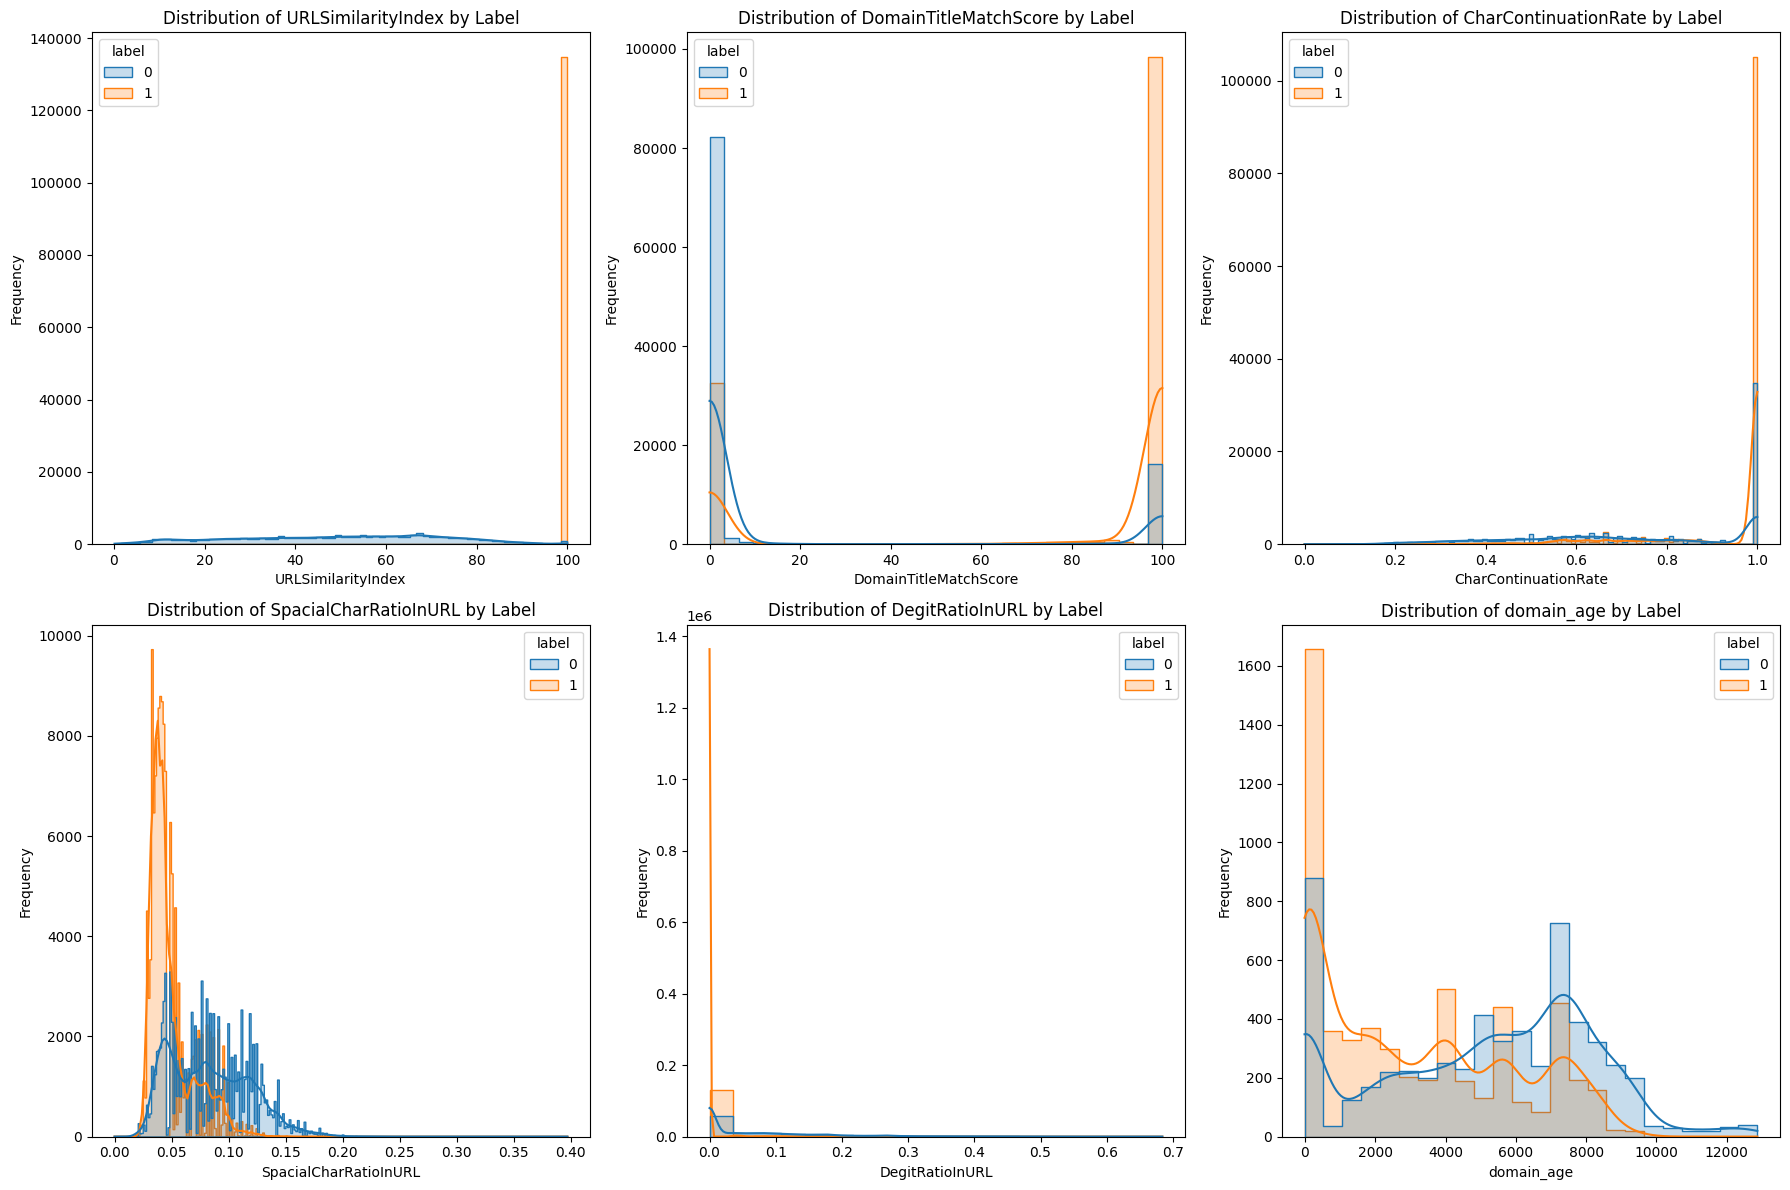

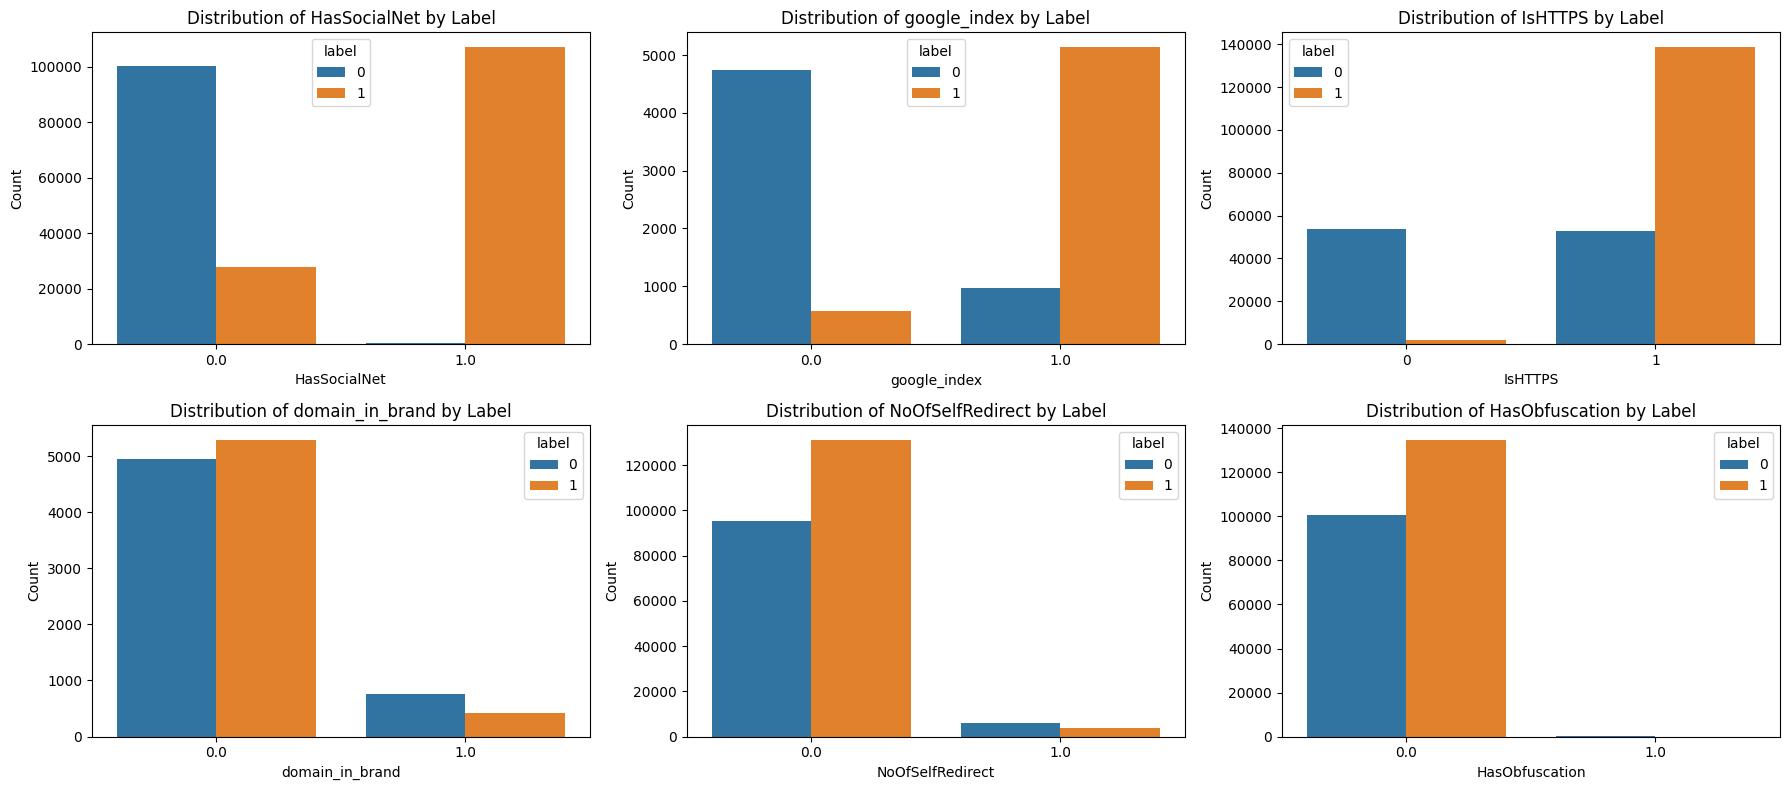

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of selected numerical and binary features for visualization
numerical_features_to_plot = ['URLSimilarityIndex', 'DomainTitleMatchScore', 'CharContinuationRate',
                              'SpacialCharRatioInURL', 'DegitRatioInURL', 'domain_age']
binary_features_to_plot = ['HasSocialNet', 'google_index', 'IsHTTPS', 'domain_in_brand', 'NoOfSelfRedirect', 'HasObfuscation']

# Plot numerical features
plt.figure(figsize=(18, 12))
for i, feature in enumerate(numerical_features_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=df, x=feature, hue='label', kde=True, element="step")
    plt.title(f'Distribution of {feature} by Label')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Plot binary features
plt.figure(figsize=(18, 8))
for i, feature in enumerate(binary_features_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, x=feature, hue='label')
    plt.title(f'Distribution of {feature} by Label')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


>**Key Insights:**
>- From these visualizations, it's clear that certain features effectively distinguish between phishing and legitimate URLs:
>>- Highly indicative of phishing: `URLSimilarityIndex`, `CharContinuationRate`, `SpacialCharRatioInURL`, `HasSocialNet`, and `lack of Google index`.
>>- Indicative of legitimacy: `Lower special character ratios`, `older domain age`, and higher likelihood of being `indexed by Google`.